In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [30]:
df = pd.read_csv('data//churn.csv')
df.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


In [31]:
df['Int\'l Plan']=df['Int\'l Plan'].map({'yes':1, 'no':0})
df['VMail Plan']=df['VMail Plan'].map({'yes':1, 'no':0})
df['Churn?']=df['Churn?'].map({'True.':1, 'False.':0})
df.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [32]:
y=df['Churn?']
X=df.iloc[:,:-1] #Todas las columnas menos la última

In [33]:
X=X.drop(columns=['Phone', 'State'])
X.head(2)

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [35]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)
print('The accuracy is', model.score(X_test,y_test))

The accuracy is 0.9544364508393285


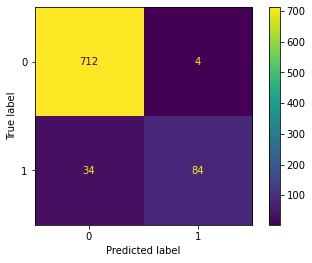

In [36]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

- El modelo no es tan bueno para predecir 1 cuando en realidad es 1 (Que el cliente se quede con la Cía.) Tiende a decir que es 0 (Es decir, que el cliente abandona)

- El modelo es muy bueno para predecir 0 cuando en realidad es 0 (Es decir, detectar quienes sí abandonan)

In [37]:
y_hat = model.predict(X_test)

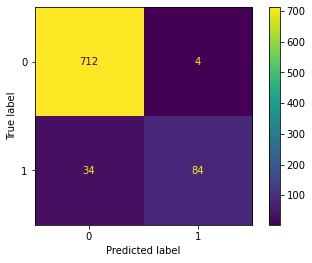

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
plt.show()

In [39]:
precision_score(y_test,y_hat), recall_score(y_test,y_hat)

(0.9545454545454546, 0.711864406779661)

Recall score no es tan bueno; sin embargo, puedes decir que el modelo funciona gracias al score de precisión

las 5 caracteristicas mas importantes:

Account Length - Feature: 0, Score: 0.03023
Area Code - Feature: 1, Score: 0.00746
Int'l Plan - Feature: 2, Score: 0.06841
VMail Plan - Feature: 3, Score: 0.01816
VMail Message - Feature: 4, Score: 0.02817
Day Mins - Feature: 5, Score: 0.13296
Day Calls - Feature: 6, Score: 0.03396
Day Charge - Feature: 7, Score: 0.14903
Eve Mins - Feature: 8, Score: 0.06545
Eve Calls - Feature: 9, Score: 0.02805
Eve Charge - Feature: 10, Score: 0.06532
Night Mins - Feature: 11, Score: 0.03779
Night Calls - Feature: 12, Score: 0.02858
Night Charge - Feature: 13, Score: 0.04072
Intl Mins - Feature: 14, Score: 0.04099
Intl Calls - Feature: 15, Score: 0.04577
Intl Charge - Feature: 16, Score: 0.03896
CustServ Calls - Feature: 17, Score: 0.14000


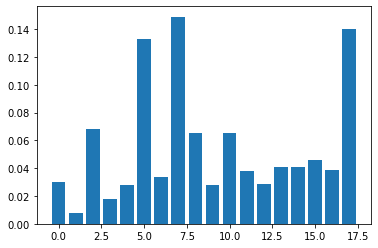

In [40]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(X.columns[i],'- Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [41]:
from sklearn.tree import plot_tree
import graphviz

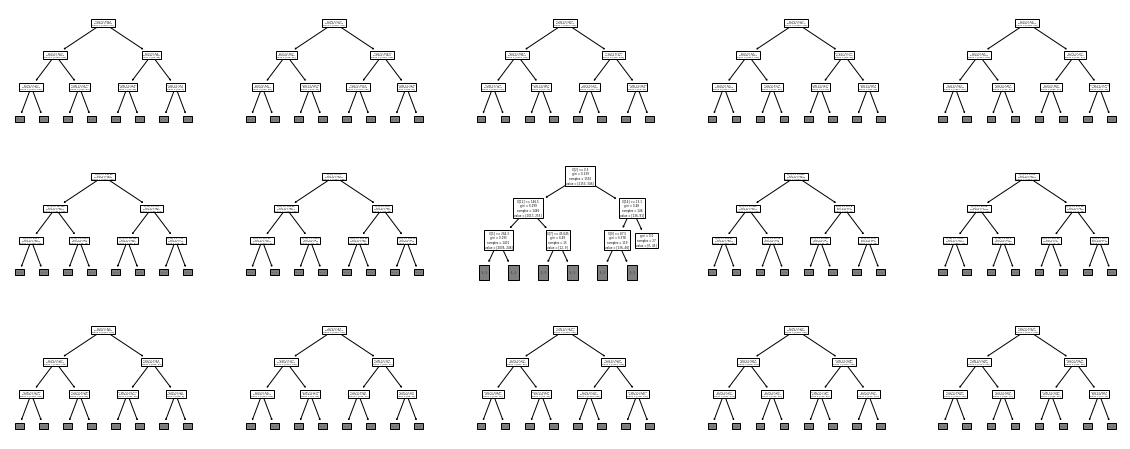

In [42]:
fig, axs = plt.subplots(3,5, figsize=(20,8))
axs = axs.flatten()
for i in range(15):
    tree = model.estimators_[i]
    plot_tree(model.estimators_[i], max_depth=2, ax=axs[i])

In [43]:
trees = np.arange(1,51)
accuracy = np.empty(50)

for i in range(50):
    model=RandomForestClassifier(n_estimators=trees[i]).fit(X_train,y_train)
    acc = model.score(X_test,y_test)
    accuracy[i]=acc

print(accuracy)

[0.86450839 0.92326139 0.90407674 0.91606715 0.93645084 0.94964029
 0.94604317 0.95083933 0.93645084 0.94484412 0.94484412 0.93884892
 0.95083933 0.94484412 0.93645084 0.95203837 0.94244604 0.95083933
 0.94604317 0.95083933 0.94604317 0.94604317 0.94964029 0.94844125
 0.95443645 0.95203837 0.95083933 0.95443645 0.95803357 0.94964029
 0.94724221 0.95683453 0.95323741 0.95203837 0.95323741 0.95083933
 0.95443645 0.95683453 0.95083933 0.95563549 0.94964029 0.95443645
 0.95803357 0.94964029 0.95083933 0.95323741 0.95203837 0.94844125
 0.94964029 0.95563549]


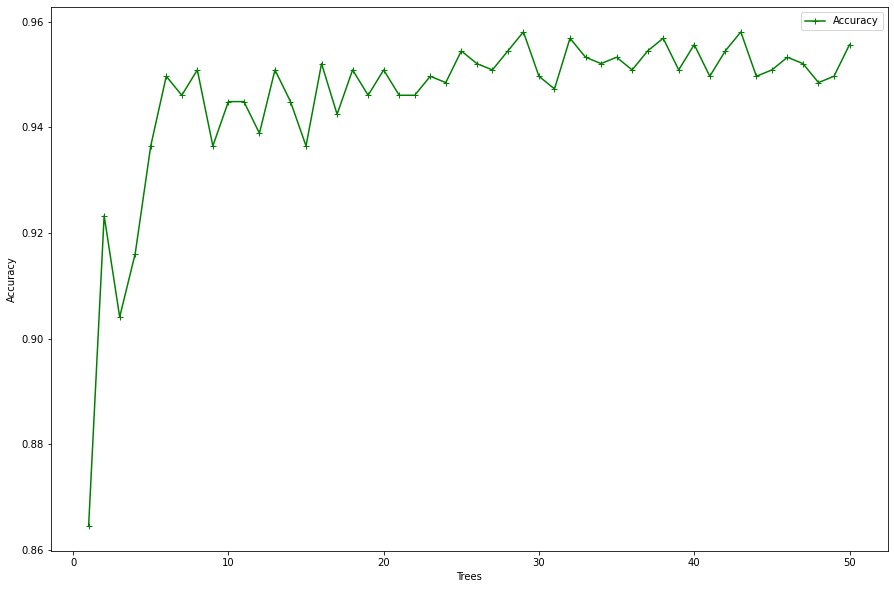

In [44]:
plt.figure(figsize=(15,10))
plt.plot(trees, accuracy, label='Accuracy', marker='+', c='green')
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.legend()

In [45]:
accuracy_features=[]
features=len(X_train.columns)
num = range(1,features)

for i in num:
    model=RandomForestClassifier(max_features=i, n_estimators=17).fit(X_train,y_train)
    #donde el accuracy es más alto es cuando el número de árboles es 17
    accuracy_features.append(model.score(X_test,y_test))

In [46]:
accuracy_features

[0.9016786570743405,
 0.9316546762589928,
 0.9400479616306955,
 0.9508393285371702,
 0.9532374100719424,
 0.9544364508393285,
 0.9556354916067147,
 0.9520383693045563,
 0.9496402877697842,
 0.9580335731414868,
 0.9568345323741008,
 0.9508393285371702,
 0.9520383693045563,
 0.9508393285371702,
 0.9484412470023981,
 0.9484412470023981,
 0.9520383693045563]

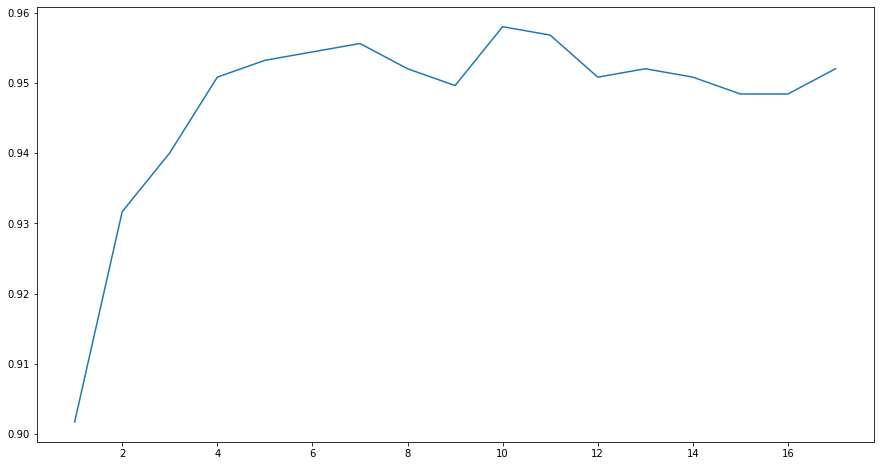

In [47]:
plt.figure(figsize=(15,8))
plt.plot(num,accuracy_features,label='Accuracy')

De acuerdo con los datos, y utilizando 17 árboles según el desempeño del número de árboles (gráfico anterior), pareciera que el óptimo de features es 6
También pueden verse los óptimos de los hiperparámetros (features y número de árboles) utilizando GridSearch...

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parametros = {'n_estimators': range(10,20,2),  #Número de árboles a testear
              'criterion': ['gini', 'entropy'],
              'max_depth': list(range(1,5)) + [None],
              'max_features': ['log2', 'sqrt']
}

model=RandomForestClassifier()
gs=GridSearchCV(model, parametros, cv=5, n_jobs=1)
gs.fit(X_train,y_train)
gs.best_score_, gs.best_params_


(0.9463759519038076,
 {'criterion': 'gini',
  'max_depth': None,
  'max_features': 'sqrt',
  'n_estimators': 16})

Utilizando GridSearch, se logra un accuracy superior a la obtenida en los puntos anteriores dado que testea todas las alternativas listadas
Ajustando otros modelos...

In [50]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression

In [51]:
lr=LinearRegression().fit(X_train,y_train)
lr.score(X_test,y_test)

0.1841845376189275

In [52]:
logit = LogisticRegression(max_iter=1000000).fit(X_train,y_train)
logit.score(X_test,y_test)

0.86810551558753

El uso de Random Forest es superior a los modelos ajustados en cuanto a su accuracy